# STATS 503 Final Project: Analyzing Volatile Organic Compounds in the Blood.
### Omar Afifi

### Dependencies

In [1]:
import numpy as np
import pandas as pd
import requests 
import io
from matplotlib import pyplot as plt
import matplotlib

### Getting The Data From CDC

Most of these code chunks are just pulling data

In [135]:
#Personal Smoking Habits
questionnaire_url_18 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2017-2018/P_SMQ.XPT'
questionnaire_url_16 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2015-2016/SMQ_I.XPT'
questionnaire_url_14 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2013-2014/SMQ_H.XPT'
questionnaire_url_12 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2011-2012/SMQ_G.XPT'
questionnaire_url_10 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2009-2010/SMQ_F.XPT'
questionnaire_url_8  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2007-2008/SMQ_E.XPT'
questionnaire_url_6  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2005-2006/SMQ_D.XPT'
questionnaire_url_4  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2003-2004/SMQ_C.XPT'
questionnaire_url_2  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2001-2002/SMQ_B.XPT'
questionnaire_url_0  = 'https://wwwn.cdc.gov//Nchs/Nhanes/1999-2000/SMQ.XPT'

#Second Hand smoke Exposure
shs_questionnaire_url_18 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2017-2018/P_SMQFAM.XPT'
shs_questionnaire_url_16 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2015-2016/SMQFAM_I.XPT'
shs_questionnaire_url_14 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2013-2014/SMQFAM_H.XPT'
shs_questionnaire_url_12 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2011-2012/SMQFAM_G.XPT'
shs_questionnaire_url_10 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2009-2010/SMQFAM_F.XPT'
shs_questionnaire_url_8  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2007-2008/SMQFAM_E.XPT'
shs_questionnaire_url_6  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2005-2006/SMQFAM_D.XPT'
shs_questionnaire_url_4  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2003-2004/SMQFAM_C.XPT'
shs_questionnaire_url_2  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2001-2002/SMQFAM_B.XPT'
shs_questionnaire_url_0  = 'https://wwwn.cdc.gov//Nchs/Nhanes/1999-2000/SMQFAM.XPT'


#VOC levels
voc_url_18 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2017-2018/P_VOCWB.XPT'
voc_url_16 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2015-2016/VOCWB_I.XPT'
voc_url_14 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2013-2014/VOCWB_H.XPT'
voc_url_12 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2011-2012/VOCWB_G.XPT'
voc_url_10 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2009-2010/VOCWB_F.XPT'
voc_url_8  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2007-2008/VOCWB_E.XPT'
voc_url_6  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2005-2006/VOCWB_D.XPT'
voc_url_4  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2003-2004/L04VOC_C.XPT'
voc_url_2  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2001-2002/L04VOC_B.XPT'
voc_url_0  = 'https://wwwn.cdc.gov//Nchs/Nhanes/1999-2000/LAB04.XPT'

urls_2013 = [(shs_questionnaire_url_0, questionnaire_url_0, voc_url_0),(shs_questionnaire_url_2, questionnaire_url_2, voc_url_2),(shs_questionnaire_url_4, questionnaire_url_4, voc_url_4),
        (shs_questionnaire_url_6, questionnaire_url_6, voc_url_6),(shs_questionnaire_url_8, questionnaire_url_8, voc_url_8),(shs_questionnaire_url_10, questionnaire_url_10, voc_url_10),
        (shs_questionnaire_url_12, questionnaire_url_12, voc_url_12)]

urls_2014 = [(shs_questionnaire_url_14, questionnaire_url_14, voc_url_14),(shs_questionnaire_url_16, questionnaire_url_16, voc_url_16),
        (shs_questionnaire_url_18,questionnaire_url_18, voc_url_18)]


def read_sas_url(url):
    r = requests.get(url)
    return pd.read_sas(io.BytesIO(r.content), format= 'xport')

In [136]:
def request_data(urls, predictors_list, response_var_d, response_var_sh):

    """
    This function requests a list of similar datasets from the cdc website

    urls: The url to the dataset
    predictor_list : the lsit of variables to be pulled from the dataset
    response_var_d: the response variable to be pulled from the direct smoking habits questionaire
    response_var_sh: the response variable to be pulled from the second hand smoke exposure questionaire
    """
    all_dfs = []

    for url_sh, url_d, url_X in urls:

        print(f"Fetching Data for Year: {url_X[34:43] }")
        
        X = read_sas_url(url_X)
        d = read_sas_url(url_d)
        sh = read_sas_url(url_sh)

        Data_year = pd.merge(pd.merge(X, d, on = ['SEQN']), sh, on = ['SEQN'])[predictors_list + [response_var_d, response_var_sh]]

        all_dfs.append(Data_year)
    
    Data_Xy = pd.concat(all_dfs)
    Data_Xy= Data_Xy.dropna().reindex()
    Data_Xy[response_var_d] = Data_Xy[response_var_d].astype(int)-1 
    Data_Xy[response_var_sh] = Data_Xy[response_var_sh].astype(int)

    return Data_Xy

def fetch_data(urls1, urls2, predictors_list, response1, response13, response14, save = False):

    """
    This function requests a Multiplte datasets from the cdc website: 
    this function is necessariy because datasets can have different variables/names with the same data
    Functionally, it just calls request_data and combines the frames.
    """

    df1 = request_data(urls1, predictors_list, response1, response13)
    df2 = request_data(urls2, predictors_list, response1, response14)
    Data_Xy = pd.concat([df1, df2])

    if save == True:
        #You have to put the path you want to save the frame to here
        Data_Xy.to_csv('/Users/omarafifi/Downloads/NHANES Project/data/NHANES.csv')
        print('Data Copied into Local Directory.')
        
    print("Data Load Complete.")

    return Data_Xy

### Cleaning the Data

Most of these chunks involve preparing the response variables: 

#### for after before 2006, the second hand smoking code is SMD469:

0 -	No houseold memebr is a smoker	

1 -	1 household member is a smoker	

2 -	2 household members are smokers

3 -	3 or more household members are 

#### for data before 2006, the second hand smoking code is SMD410:

1 -	 No houseold member is a smoker	

0- - Someone in the house smokes.	

This creates some formatting inconsitencies that we have to remedy


In [137]:
#some of the respone formatting is inconsistent ... this reformats things. 
def relable(df):

    """
    The response variables for second hand smokers and direct smokers are different [0,1,2] vs [1,0]. 
    This function converts them so that they index from 0. 
    """

    data = df.copy()

    data['SMD460']+= 1
    data['SMD460'] = data['SMD460'].fillna(0)
    data = data[data['SMD460'] < 10]

    data['SMD460'] = (data['SMD460'] > 1).astype(int)


    data['SMD410'] = data['SMD410'].fillna(0)
    data = data[data['SMD410'] < 3]
    data['SMD410'] = (data['SMD410'] == 1).astype(int)


    data['SH EXP']  = data['SMD460'] + data['SMD410']
    data = data.drop(['SMD410','SMD460'], axis = 1)

    #1 if the person smokes
    data['SMOKE'] = (data['SMQ040']<2).astype(int)

    return data.drop(['SMQ040'], axis = 1)

def process(df, transform = False, combine_columns = True):

    """This applies a log transformation to the predictors and combines the response variables int0 a single response
    transform: if the log transformation should be applied
    combine_columns: if the responses should be combines: this should only be false if you want to partition the data by response groups.
    """

    data = df.copy()
    data = relable(data)

    #people who are not exposed to tobacco at all
    non_smokers = data[data['SMOKE'] == 0]
    non_smokers = non_smokers[non_smokers['SH EXP'] == 0]
    #people exposed to smoke, but who do not smoke
    sh_smokers = data[data['SMOKE'] == 0]
    sh_smokers = sh_smokers[sh_smokers['SH EXP'] == 1]

    smokers = data[data['SMOKE'] == 1]

    data = pd.concat([non_smokers, sh_smokers, smokers])

    if combine_columns: # make a single response variable: 0,1,2 
            data['SMOKE'] = data['SMOKE']+ data['SH EXP']
            data = data.drop(['SH EXP'], axis = 1)

    #take the log transformation
    if transform == True:
        data['LBXVBZ'] = np.log(data['LBXVBZ'])
        data['LBXVEB'] = np.log(data['LBXVEB'])
        data['LBXVXY'] = np.log(data['LBXVXY'])
    
    #reshuffle
    return data.sample(frac=1).reset_index(drop=True)


### Data Preprocessing



In [5]:
predictors_list = ['LBXVBZ','LBXVEB','LBXVXY']
response_var_d = 'SMQ040'
response_var_sh_2013 = 'SMD410'
response_var_sh_2014 = 'SMD460'

#transformed and seperate responses (i.e. one columns for secod hand exposure, and one columns for whether or not they smoke)
nhanes_log_sc= process(fetch_data(urls_2013, urls_2014, predictors_list, 
                                              response_var_d, response_var_sh_2013, 
                                              response_var_sh_2014, save = False), 
                                              transform= True, combine_columns=False)
#transformed with combined responses : this is the frame that gets used for prediction
nhanes_log__cc = process(fetch_data(urls_2013, urls_2014, predictors_list, 
                                              response_var_d, response_var_sh_2013, 
                                              response_var_sh_2014, save = False), 
                                              transform= True, combine_columns=True)
#untransfored and seperate repsonses
nhanes_no_log_sc = process(fetch_data(urls_2013, urls_2014, predictors_list, 
                                              response_var_d, response_var_sh_2013, 
                                              response_var_sh_2014, save = False), 
                                              transform= False, combine_columns=False)
#untransformed with combined responses.
nhanes_no_log_cc = process(fetch_data(urls_2013, urls_2014, predictors_list, 
                                              response_var_d, response_var_sh_2013, 
                                              response_var_sh_2014, save = False), 
                                              transform= False, combine_columns=True)


Fetching Data for Year: 1999-2000
Fetching Data for Year: 2001-2002
Fetching Data for Year: 2003-2004
Fetching Data for Year: 2005-2006
Fetching Data for Year: 2007-2008
Fetching Data for Year: 2009-2010
Fetching Data for Year: 2011-2012
Fetching Data for Year: 2013-2014
Fetching Data for Year: 2015-2016
Fetching Data for Year: 2017-2018
Data load Complete.
Fetching Data for Year: 1999-2000
Fetching Data for Year: 2001-2002
Fetching Data for Year: 2003-2004
Fetching Data for Year: 2005-2006
Fetching Data for Year: 2007-2008
Fetching Data for Year: 2009-2010
Fetching Data for Year: 2011-2012
Fetching Data for Year: 2013-2014
Fetching Data for Year: 2015-2016
Fetching Data for Year: 2017-2018
Data load Complete.
Fetching Data for Year: 1999-2000
Fetching Data for Year: 2001-2002
Fetching Data for Year: 2003-2004
Fetching Data for Year: 2005-2006
Fetching Data for Year: 2007-2008
Fetching Data for Year: 2009-2010
Fetching Data for Year: 2011-2012
Fetching Data for Year: 2013-2014
Fetching

### Data Analysis

#### This Section Consists of Various Plots to Help Vizualize the Data

### Plotting the data

In [138]:
# partitioning the data into three group
# note that in the sc frames smoke is an indicator variable but in the cc frames, smoke is a 0,1,2 variable. so in a cc frame, smoke = 1 
# means the person smokes, but in a sc frame, it means they are exposed to smoke but do not smoke. 

#not transformer
smokers_nl = nhanes_no_log_sc[nhanes_no_log_sc['SMOKE'] == 1] #smokers
non_smokers_nl = nhanes_no_log_sc[nhanes_no_log_sc['SMOKE'] == 0]  #non-smokers
non_smokers_nl = non_smokers_nl[non_smokers_nl['SH EXP'] == 0]   #non-smokers

#transformed
smokers_l = nhanes_log_sc[nhanes_log_sc['SMOKE'] == 1] 
non_smokers_l = nhanes_log_sc[nhanes_log_sc['SMOKE'] == 0]
non_smokers_l = non_smokers_l[non_smokers_l['SH EXP'] == 0]

#second hand smokers
sh_smokers_l = nhanes_log__cc[nhanes_log__cc['SMOKE']== 1]
sh_smokers_nl = nhanes_no_log_cc[nhanes_no_log_cc['SMOKE'] == 1]



### Histogram to veiw the class imbalances

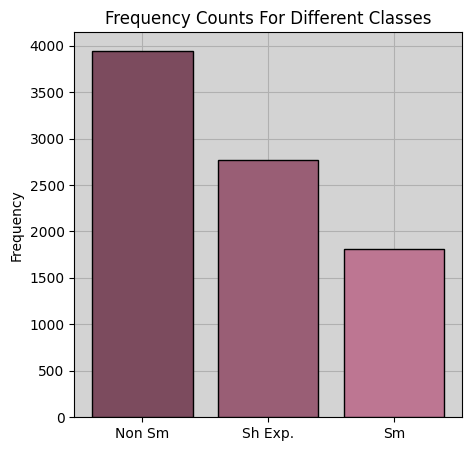

In [143]:
fig, axis = plt.subplots(1,1, figsize = (5,5))

c = ['#7C4B5E', '#995E75', '#BD7692' ]
axis.set_xticks([0,1,2])
axis.set_xticklabels(['Non Sm', 'Sh Exp.', "Sm"])
axis.set_ylabel('Frequency')
axis.grid(zorder=0)
axis.set_facecolor('lightgrey')
axis.bar(x = [0,1,2], height = nhanes_log__cc.value_counts('SMOKE'), 
            edgecolor = 'black', color = c, zorder=3)
axis.set_title('Frequency Counts For Different Classes')
plt.show()

### Vizualizing the effect of taking a log over the predictor Space

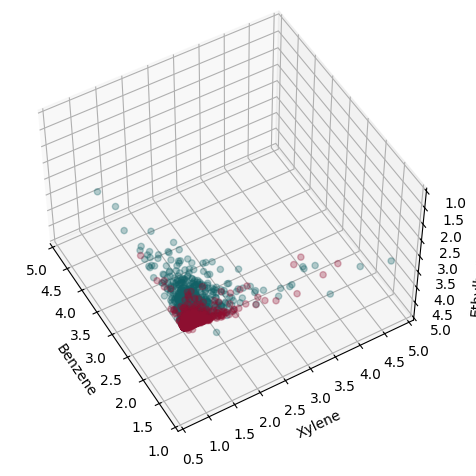

In [8]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(xs = smokers_nl['LBXVBZ'], ys = smokers_nl['LBXVXY'], zs = smokers_nl['LBXVEB'], c = '#126166', alpha = .3);
ax.scatter3D(xs = non_smokers_nl['LBXVBZ'], ys = non_smokers_nl['LBXVXY'], zs = non_smokers_nl['LBXVEB'], c = '#900F30', alpha = .3);
ax.set_xlim(1,5)
ax.set_zlim(1,5)
ax.set_ylim(.5,5)
ax.set_xlabel(f'Benzene')
ax.set_ylabel('Xylene')
ax.set_zlabel('Ethylbenzene')
ax.view_init(230, 30, 0)
plt.savefig('/Users/omarafifi/Downloads/NHANES Project/data/output_images/no_log')
plt.tight_layout(w_pad = 20, h_pad = 10)
plt.show()

# Data for a three-dimensional line

#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points





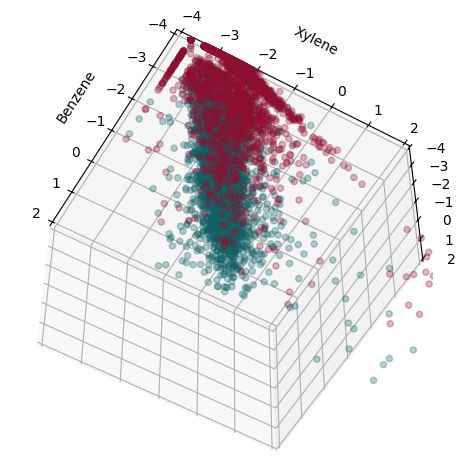

In [21]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(111, projection='3d')


ax.scatter3D(xs = smokers_l['LBXVBZ'], ys = smokers_l['LBXVXY'], zs = smokers_l['LBXVEB'], c = '#126166', alpha = .3);
ax.scatter3D(xs = non_smokers_l['LBXVBZ'], ys = non_smokers_l['LBXVXY'], zs = non_smokers_l['LBXVEB'], c = '#900F30', alpha = .3);
ax.set_xlim(-4,2)
ax.set_zlim(-4,2)
ax.set_ylim(-4,2)
ax.set_xlabel(f'Benzene')
ax.set_ylabel('Xylene')
ax.set_zlabel('Ethylbenzene')
ax.view_init(-235, 30, 0)
plt.savefig('/Users/omarafifi/Downloads/NHANES Project/data/output_images/no_log')
plt.tight_layout(w_pad = 20, h_pad = 10)
plt.show()


### Some 3d Animations: These were very helpful in terms of analysis, but I couldn't find a good way to get them on the report. 
#### The code to make these animations was (mostly) taken from: https://stackoverflow.com/questions/68100031/animated-3d-surface-plots-with-plotly

In [35]:
import plotly.graph_objects as go
import numpy as np

# Helix equation
t = np.linspace(0, 10, 50)
x = smokers_l['LBXVBZ']
y = smokers_l['LBXVXY']
z = smokers_l['LBXVEB']

xp = non_smokers_l['LBXVBZ']
yp = non_smokers_l['LBXVXY']
zp = non_smokers_l['LBXVEB']

fig = go.Figure([go.Scatter3d(x=x, y=y, z=z, mode='markers',marker=dict(
        size=4,
        color='#126166',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ) ),
    go.Scatter3d(x=xp, y=yp, z=zp, mode='markers',marker=dict(
        size=4,
        color='#900F30',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ), opacity=.3 )])
x_eye = -1.25
y_eye = 2
z_eye = 0.5

fig.update_layout(
         title='Animation Test',
         width=600,
         height=600,
         scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
         updatemenus=[dict(type='buttons',
                  showactive=False,
                  y=1,
                  x=0.8,
                  xanchor='left',
                  yanchor='bottom',
                  pad=dict(t=45, r=10),
                  buttons=[dict(label='Play',
                                 method='animate',
                                 args=[None, dict(frame=dict(duration=5, redraw=True), 
                                                             transition=dict(duration=0),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )]
                                            )
                                      ]
                              )
                        ]
)


def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

frames=[]
for t in np.arange(0, 6.26, 0.1):
    xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
    frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
fig.frames=frames

fig.show()

In [36]:
t = np.linspace(0, 10, 50)
x = smokers_nl['LBXVBZ']
y = smokers_nl['LBXVXY']
z = smokers_nl['LBXVEB']

xp = non_smokers_nl['LBXVBZ']
yp = non_smokers_nl['LBXVXY']
zp = non_smokers_nl['LBXVEB']

fig = go.Figure([go.Scatter3d(x=x, y=y, z=z, mode='markers',marker=dict(
        size=4,
        color='#126166',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.5
    ) ),
    go.Scatter3d(x=xp, y=yp, z=zp, mode='markers',marker=dict(
        size=4,
        color='#900F30',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.5
    ) )])

x_eye = -1.25
y_eye = 2
z_eye = 0.5

fig.update_layout(
         title='Animation Test',
         width=600,
         height=600,
         scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
         updatemenus=[dict(type='buttons',
                  showactive=False,
                  y=1,
                  x=0.8,
                  xanchor='left',
                  yanchor='bottom',
                  pad=dict(t=45, r=10),
                  buttons=[dict(label='Play',
                                 method='animate',
                                 args=[None, dict(frame=dict(duration=5, redraw=True), 
                                                             transition=dict(duration=0),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )]
                                            )
                                      ]
                              )
                        ]
)


def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

frames=[]
for t in np.arange(0, 6.26, 0.1):
    xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
    frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
fig.frames=frames


fig.show()

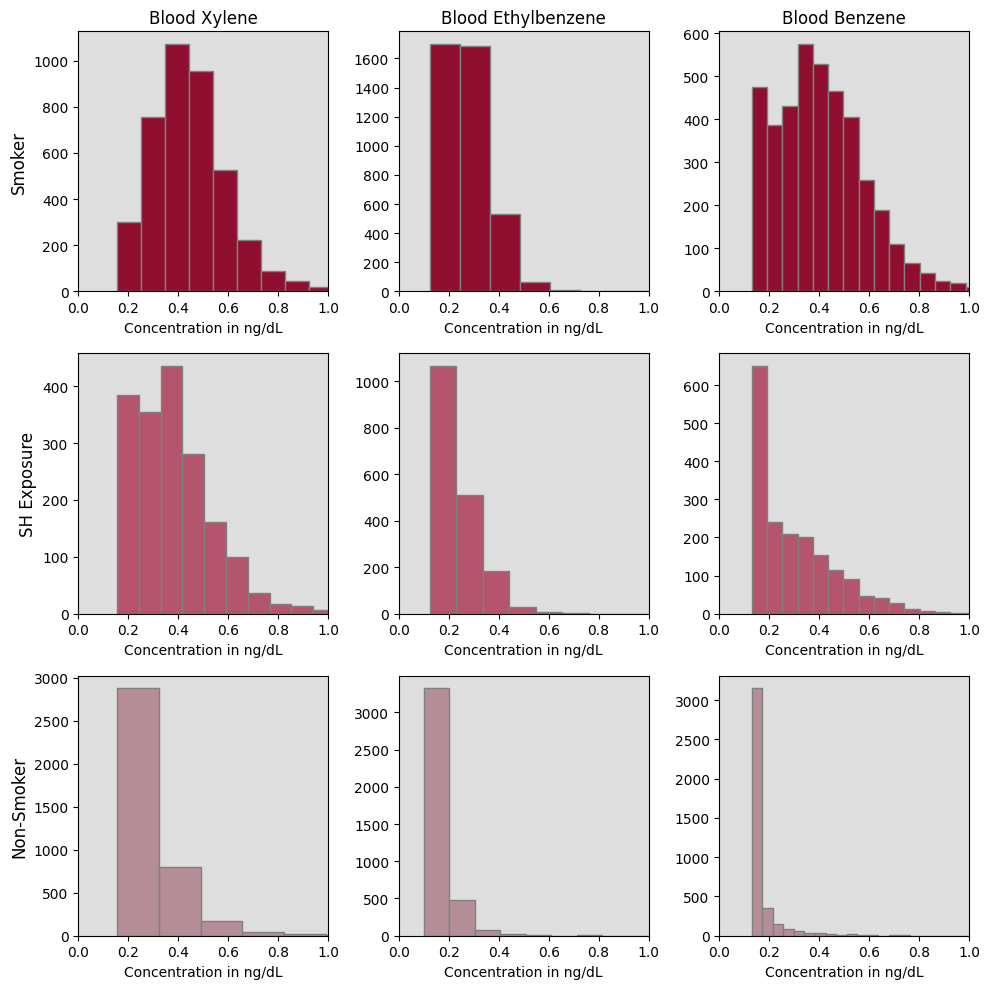

In [132]:
fig, ax = plt.subplots(3, 3, figsize = (10,10))

xdata_ns= smokers_l['LBXVXY']
ydata_ns = smokers_l['LBXVEB']

ax[0,0].set_title("Blood Xylene")
ax[0,1].set_title("Blood Ethylbenzene")
ax[0,2].set_title("Blood Benzene")

ax[0,0].set_ylabel('Smoker', rotation=90, size='large')
ax[1,0].set_ylabel('SH Exposure', rotation=90, size='large')
ax[2,0].set_ylabel('Non-Smoker', rotation=90, size='large')

ax[0,0].hist(np.sqrt(smokers_nl['LBXVXY']), bins = 50, color = '#900F30', edgecolor = 'grey')
ax[0,1].hist(np.sqrt(smokers_nl['LBXVEB']), bins = 25, color = '#900F30', edgecolor = 'grey')
ax[0,2].hist(np.sqrt(smokers_nl['LBXVBZ']), bins = 25, color = '#900F30', edgecolor = 'grey')


ax[1,0].hist(np.sqrt(sh_smokers_nl['LBXVXY']), bins = 50, color = '#B4556D', edgecolor = 'grey')
ax[1,1].hist(np.sqrt(sh_smokers_nl['LBXVEB']), bins = 25, color = '#B4556D', edgecolor = 'grey')
ax[1,2].hist(np.sqrt(sh_smokers_nl['LBXVBZ']), bins = 25, color = '#B4556D', edgecolor = 'grey')

ax[2,0].hist(np.sqrt(non_smokers_nl['LBXVXY']), bins = 25, color = '#B48D97', edgecolor = 'grey')
ax[2,1].hist(np.sqrt(non_smokers_nl['LBXVEB']), bins = 25, color = '#B48D97', edgecolor = 'grey')
ax[2,2].hist(np.sqrt(non_smokers_nl['LBXVBZ']), bins = 25, color = '#B48D97', edgecolor = 'grey')

for i in range(3):
    for j in range(3): 
        ax[i,j].set_facecolor('#DFDEDE')
        ax[i,j].set_xlim(0,1)

for i in range(3):
    for j in range(3): 
        ax[i,j].set_xlabel('Concentration in ng/dL')

plt.tight_layout()
plt.show()

### Constructing  Model

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [146]:
#using grid cv for hyperparamater searching. 
X_train, X_test, y_train, y_test = train_test_split(nhanes_log__cc.drop(['SMOKE'], axis = 1), nhanes_log__cc['SMOKE'])

pipe = Pipeline(steps = [('scale',StandardScaler()), ('clf', SVC(kernel= 'rbf', class_weight='balanced'))])

grid = GridSearchCV(pipe, param_grid= {
                     'clf__kernel':['rbf'],
                     'clf__C':[1,], #you can add more values to search on, I replaced these with the optimal values I founf for speed
                     'clf__gamma':[ 1]
                     
                     },
                    cv=5, 
                    verbose = 3
                    )

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
grid.fit(X_train, y_train)
svm_mod = grid.best_estimator_


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.703 total time=   0.6s
[CV 2/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.705 total time=   0.6s
[CV 3/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.700 total time=   0.6s
[CV 4/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.694 total time=   0.6s
[CV 5/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.693 total time=   0.6s


              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1035
           1       0.25      0.36      0.29       324
           2       0.81      0.72      0.76       771

    accuracy                           0.70      2130
   macro avg       0.64      0.63      0.63      2130
weighted avg       0.74      0.70      0.72      2130



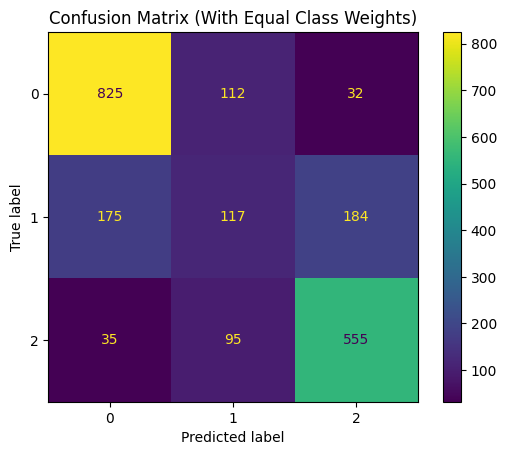

In [147]:
#classification Report and confusion matrix
print(classification_report(svm_mod.predict(X_test), y_test))

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, svm_mod.predict(X_test), labels=svm_mod.classes_),
                              display_labels=svm_mod.classes_)
disp.plot()
plt.title('Confusion Matrix (With Equal Class Weights)')

plt.show()

## Follow up Analysis: Is Isolating for second hand exposure: is it harmful? 

### Repeating the analysis but only doing pairwise bianry classification across the classes

### 1) Smokers vs non-smokers

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.914 total time=   0.1s
[CV 2/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.903 total time=   0.1s
[CV 3/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.895 total time=   0.1s
[CV 4/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.914 total time=   0.1s
[CV 5/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.910 total time=   0.1s
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1030
           2       0.88      0.91      0.90       649

    accuracy                           0.92      1679
   macro avg       0.91      0.92      0.92      1679
weighted avg       0.92      0.92      0.92      1679



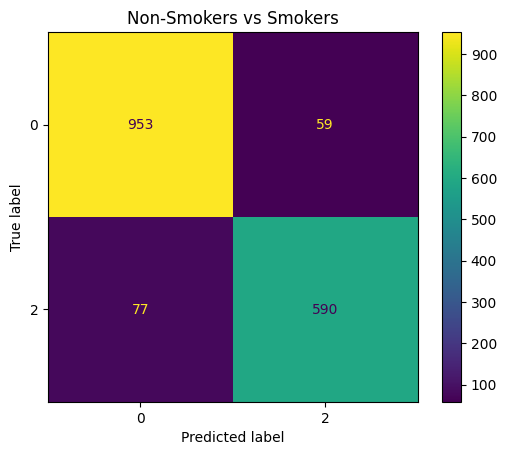

In [148]:
no_smokers = nhanes_log__cc[nhanes_log__cc['SMOKE'] != 1]

X_train, X_test, y_train, y_test = train_test_split(no_smokers.drop(['SMOKE'], axis = 1), no_smokers['SMOKE'])

pipe = Pipeline(steps = [('scale',StandardScaler()), ('clf', SVC(kernel= 'linear', class_weight=None))])

grid = GridSearchCV(pipe, param_grid= {
                     'clf__kernel':['rbf'],
                     'clf__C':[1,],
                     'clf__gamma':[ 1]
                     
                     },
                    cv=5, 
                    verbose = 3
                    )

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
grid.fit(X_train, y_train)
svm_mod = grid.best_estimator_
print(classification_report(svm_mod.predict(X_test), y_test))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, svm_mod.predict(X_test), labels=svm_mod.classes_),
                              display_labels=svm_mod.classes_)
disp.plot()
plt.title('Non-Smokers vs Smokers')
plt.show()



### 2 Second hand vs non-smoking

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.745 total time=   0.2s
[CV 2/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.793 total time=   0.2s
[CV 3/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.787 total time=   0.2s
[CV 4/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.810 total time=   0.2s
[CV 5/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.775 total time=   0.2s
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       957
           1       0.66      0.63      0.64       482

    accuracy                           0.77      1439
   macro avg       0.74      0.73      0.74      1439
weighted avg       0.76      0.77      0.77      1439



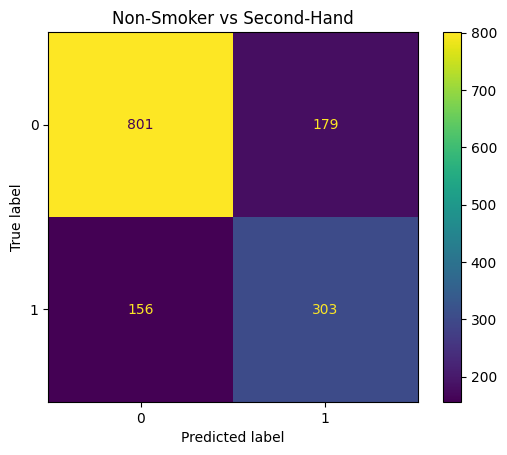

In [149]:
df = nhanes_log__cc[nhanes_log__cc['SMOKE'] != 2]

X_train, X_test, y_train, y_test = train_test_split(df.drop(['SMOKE'], axis = 1), df['SMOKE'])

pipe = Pipeline(steps = [('scale',StandardScaler()), ('clf', SVC(kernel= 'linear', class_weight='balanced'))])

grid = GridSearchCV(pipe, param_grid= {
                     'clf__kernel':['rbf'],
                     'clf__C':[1,],
                     'clf__gamma':[ 1]
                     
                     },
                    cv=5, 
                    verbose = 3
                    )

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
grid.fit(X_train, y_train)
svm_mod = grid.best_estimator_
print(classification_report(svm_mod.predict(X_test), y_test))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, svm_mod.predict(X_test), labels=svm_mod.classes_),
                              display_labels=svm_mod.classes_)
disp.plot()
plt.title('Non-Smoker vs Second-Hand')
plt.show()

### 3) Second Hand vs Smokers

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.730 total time=   0.2s
[CV 2/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.722 total time=   0.2s
[CV 3/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.724 total time=   0.2s
[CV 4/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.703 total time=   0.2s
[CV 5/5] END clf__C=1, clf__gamma=1, clf__kernel=rbf;, score=0.714 total time=   0.2s
              precision    recall  f1-score   support

           1       0.56      0.69      0.62       368
           2       0.84      0.74      0.78       776

    accuracy                           0.72      1144
   macro avg       0.70      0.72      0.70      1144
weighted avg       0.75      0.72      0.73      1144



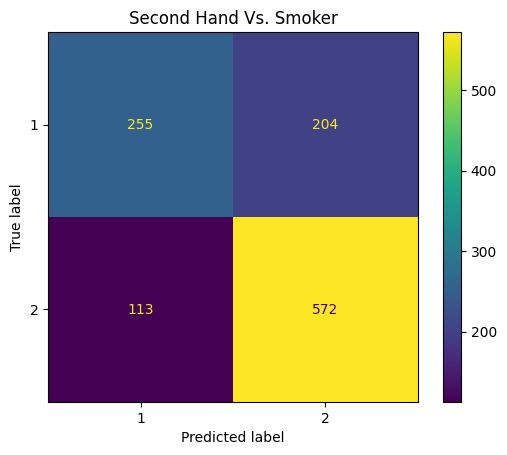

In [150]:
df = nhanes_log__cc[nhanes_log__cc['SMOKE'] != 0]

X_train, X_test, y_train, y_test = train_test_split(df.drop(['SMOKE'], axis = 1), df['SMOKE'])

pipe = Pipeline(steps = [('scale',StandardScaler()), ('clf', SVC(kernel= 'linear', class_weight='balanced'))])

grid = GridSearchCV(pipe, param_grid= {
                     'clf__kernel':['rbf'],
                     'clf__C':[1,],
                     'clf__gamma':[ 1]
                     
                     },
                    cv=5, 
                    verbose = 3
                    )

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
grid.fit(X_train, y_train)
svm_mod = grid.best_estimator_
print(classification_report(svm_mod.predict(X_test), y_test))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, svm_mod.predict(X_test), labels=svm_mod.classes_),
                              display_labels=svm_mod.classes_)
disp.plot()
plt.title('Second Hand Vs. Smoker')
plt.show()